<a href="https://colab.research.google.com/github/Roshnasviji/ML_google_colab/blob/main/COPD_disease_abstract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [ ]:
from google.colab import files
files.upload()

Saving dataset1.csv to dataset1 (1).csv


{'dataset1 (1).csv': b'number,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,FVCPRED,CAT,HAD,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD\r\n1,58,77,60,SEVERE,120,120,120,1.21,36,2.4,98,25,8,69.55,4,3,1,2,1,0,0,1,0\r\n2,57,79,50,MODERATE,165,176,176,1.09,56,1.64,65,12,21,44.24,4,2,0,2,1,0,0,1,1\r\n3,62,80,11,MODERATE,201,180,201,1.52,68,2.3,86,22,18,44.09,4,2,0,2,1,0,0,1,0\r\n4,145,56,60,VERY SEVERE,210,210,210,0.47,14,1.14,27,28,26,62.04,1,4,1,2,0,0,1,1,0\r\n5,136,65,68,SEVERE,204,210,210,1.07,42,2.91,98,32,18,75.56,1,3,1,2,0,1,1,0,0\r\n6,84,67,26,MODERATE,216,180,216,1.09,50,1.99,60,29,21,73.82,2,2,0,1,1,0,0,1,0\r\n7,93,67,50,SEVERE,214,237,237,0.69,35,1.31,48,29,30,77.44,2,3,0,1,1,0,0,1,0\r\n8,27,83,90,SEVERE,214,237,237,0.68,32,2.23,77,22,2,45.41,4,3,1,2,1,0,0,1,0\r\n9,114,72,50,MODERATE,231,237,237,2.13,63,4.38,80,25,6,69.61,3,2,1,1,1,0,0,1,0\r\n10,152,75,6,SEVERE,226,240,240,1.06,46,2.06,75,31,20,55.56,3,3,0,2,0,1,0,0,0\

In [ ]:
patient_data = pd.read_csv('dataset1.csv')
patient_data

,number,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,97,10,68,25.0,MILD,511.0,575.0,575.0,2.70,98.0,...,35.84,2,1,1,2,0,1,0,0,0
97,98,43,75,40.0,MILD,576.0,577.0,577.0,2.90,93.0,...,15.05,3,1,1,2,0,1,0,0,1
98,99,74,68,30.0,MODERATE,468.0,582.0,582.0,1.65,67.0,...,19.70,2,2,0,2,0,0,1,0,0
99,100,108,54,30.0,SEVERE,688.0,699.0,699.0,1.72,44.0,...,20.55,1,3,1,2,0,0,0,0,0


In [ ]:
patient_data.shape

(101, 24)

In [ ]:
patient_data.head()

,number,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,SEVERE,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,MODERATE,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,MODERATE,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,VERY SEVERE,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,SEVERE,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0


In [ ]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number        101 non-null    int64  
 1   ID            101 non-null    int64  
 2   AGE           101 non-null    int64  
 3   PackHistory   101 non-null    float64
 4   COPDSEVERITY  101 non-null    object 
 5   MWT1          99 non-null     float64
 6   MWT2          100 non-null    float64
 7   MWT1Best      100 non-null    float64
 8   FEV1          101 non-null    float64
 9   FEV1PRED      101 non-null    float64
 10  FVC           101 non-null    float64
 11  FVCPRED       101 non-null    int64  
 12  CAT           101 non-null    int64  
 13  HAD           101 non-null    float64
 14  SGRQ          101 non-null    float64
 15  AGEquartiles  101 non-null    int64  
 16  copd          101 non-null    int64  
 17  gender        101 non-null    int64  
 18  smoking       101 non-null    

In [ ]:
patient_data.isnull().sum()

number          0
ID              0
AGE             0
PackHistory     0
COPDSEVERITY    0
MWT1            2
MWT2            1
MWT1Best        1
FEV1            0
FEV1PRED        0
FVC             0
FVCPRED         0
CAT             0
HAD             0
SGRQ            0
AGEquartiles    0
copd            0
gender          0
smoking         0
Diabetes        0
muscular        0
hypertension    0
AtrialFib       0
IHD             0
dtype: int64

In [ ]:
patient_data = patient_data.dropna()

In [ ]:
patient_data.describe()

,number,ID,AGE,PackHistory,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,FVC,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,50.434343,91.474747,70.121212,39.803030,385.858586,389.797980,398.717172,1.603131,58.400808,2.957778,...,40.169596,2.474747,2.202020,0.636364,1.838384,0.212121,0.191919,0.111111,0.202020,0.090909
std,29.151666,52.035181,7.873065,24.623162,104.744199,108.194456,107.019552,0.676037,22.446883,0.979259,...,18.359603,1.100496,0.891911,0.483494,0.369972,0.410891,0.395814,0.315869,0.403551,0.288943
min,1.000000,1.000000,44.000000,1.000000,120.000000,120.000000,120.000000,0.450000,3.290000,1.140000,...,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.500000,48.500000,65.500000,21.500000,300.000000,302.500000,302.500000,1.095000,42.000000,2.275000,...,28.370000,1.500000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,87.000000,71.000000,36.000000,419.000000,399.000000,420.000000,1.600000,60.000000,2.770000,...,38.210000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.500000,143.500000,75.000000,52.500000,460.500000,459.000000,465.500000,1.945000,75.000000,3.630000,...,55.395000,3.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,169.000000,88.000000,109.000000,688.000000,699.000000,699.000000,3.180000,102.000000,5.370000,...,77.440000,4.000000,4.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
patient_data['COPDSEVERITY'].value_counts()

MODERATE       41
SEVERE         27
MILD           23
VERY SEVERE     8
Name: COPDSEVERITY, dtype: int64

In [ ]:
patient_data['AGE'].value_counts()

73    8
75    8
72    7
67    6
78    5
68    5
65    5
71    5
74    4
69    4
70    4
76    4
64    4
63    3
80    3
82    2
62    2
81    2
77    2
55    2
83    2
44    1
88    1
53    1
79    1
59    1
66    1
56    1
49    1
61    1
60    1
52    1
54    1
Name: AGE, dtype: int64

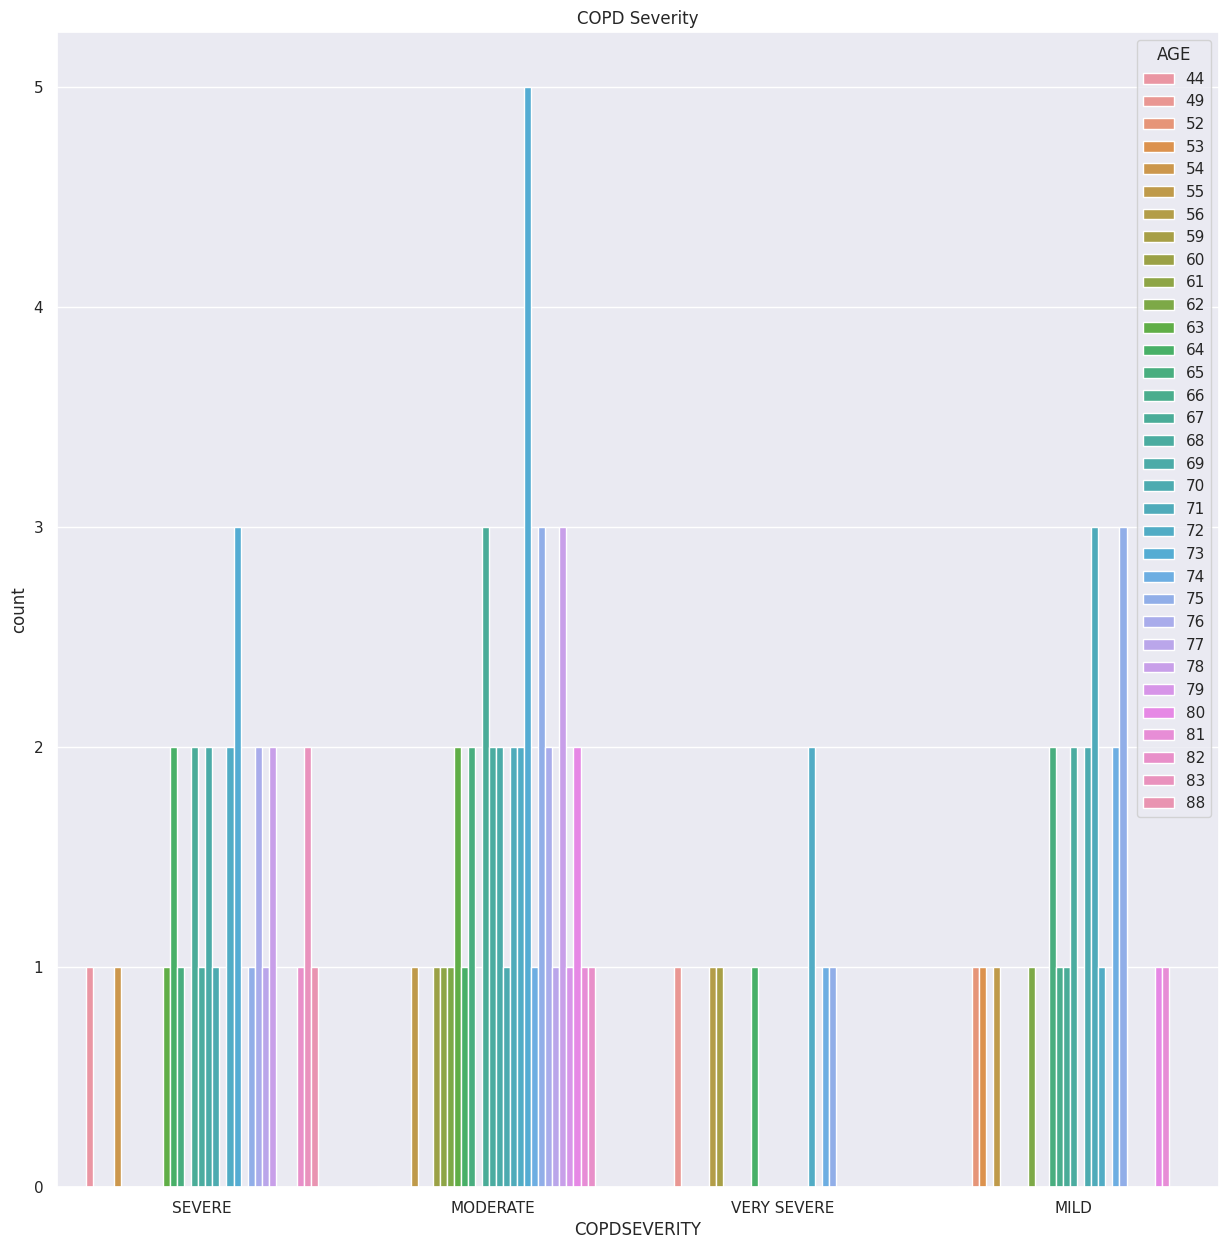

In [ ]:
sns.set()
plt.figure(figsize=(15,15))
sns.countplot(x='COPDSEVERITY',hue = 'AGE', data = patient_data)
plt.title('COPD Severity')
plt.show()

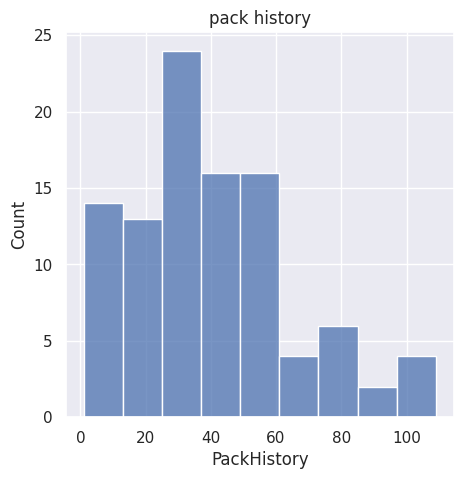

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(patient_data['PackHistory'])
plt.title('pack history')
plt.show()

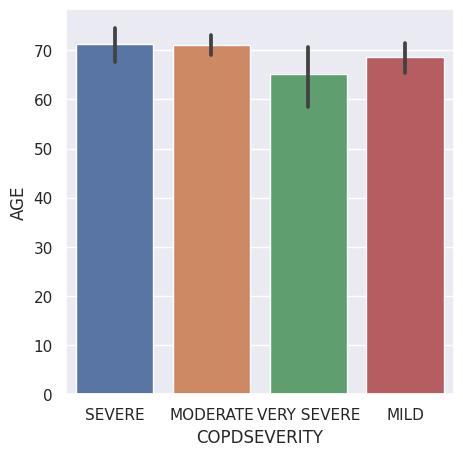

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='COPDSEVERITY',y = 'AGE',data=patient_data)
plt.show()

In [ ]:
patient_data.replace({'COPDSEVERITY':{'SEVERE':0,'MODERATE':1,'VERY SEVERE':2,'MILD':3}},inplace=True)
patient_data

<ipython-input-60-ac15fe671880>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_data.replace({'COPDSEVERITY':{'SEVERE':0,'MODERATE':1,'VERY SEVERE':2,'MILD':3}},inplace=True)


,number,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,...,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
0,1,58,77,60.0,0,120.0,120.0,120.0,1.21,36.0,...,69.55,4,3,1,2,1,0,0,1,0
1,2,57,79,50.0,1,165.0,176.0,176.0,1.09,56.0,...,44.24,4,2,0,2,1,0,0,1,1
2,3,62,80,11.0,1,201.0,180.0,201.0,1.52,68.0,...,44.09,4,2,0,2,1,0,0,1,0
3,4,145,56,60.0,2,210.0,210.0,210.0,0.47,14.0,...,62.04,1,4,1,2,0,0,1,1,0
4,5,136,65,68.0,0,204.0,210.0,210.0,1.07,42.0,...,75.56,1,3,1,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,12,72,30.0,1,558.0,563.0,558.0,1.61,61.0,...,34.64,3,2,1,2,0,0,0,0,1
96,97,10,68,25.0,3,511.0,575.0,575.0,2.70,98.0,...,35.84,2,1,1,2,0,1,0,0,0
97,98,43,75,40.0,3,576.0,577.0,577.0,2.90,93.0,...,15.05,3,1,1,2,0,1,0,0,1
98,99,74,68,30.0,1,468.0,582.0,582.0,1.65,67.0,...,19.70,2,2,0,2,0,0,1,0,0


correlation

In [ ]:
correlation = patient_data.corr()

<Axes: >

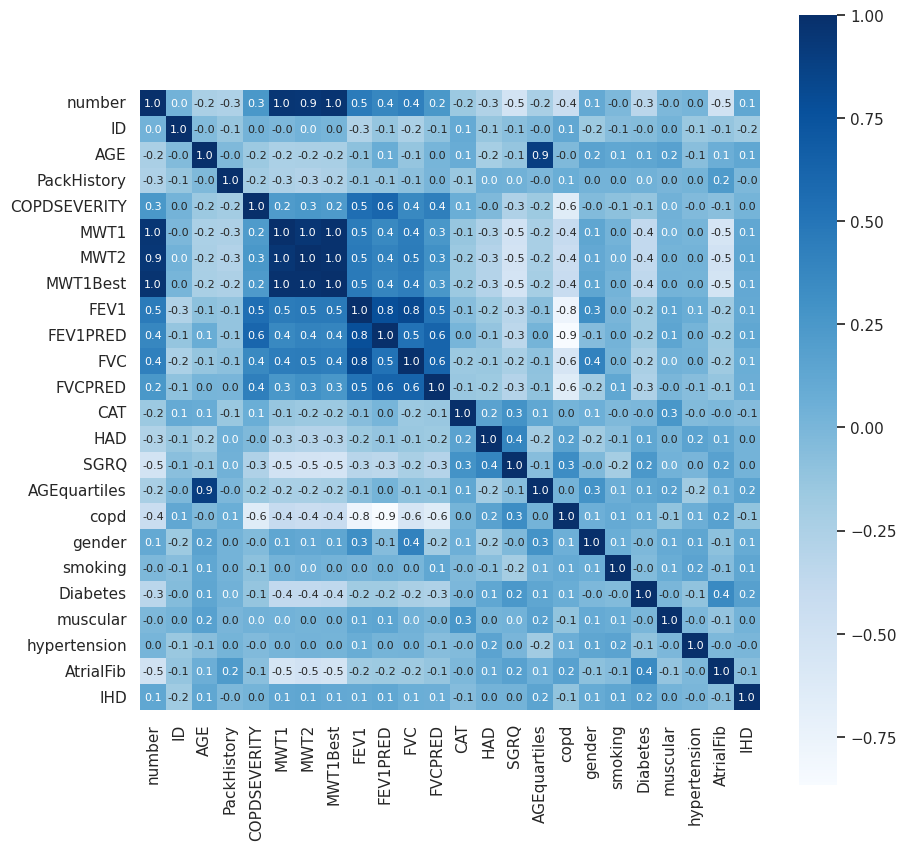

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap = 'Blues')

Splitting the data

In [ ]:
X = patient_data.drop(columns = ['number','COPDSEVERITY','ID'],axis=1)
Y = patient_data['COPDSEVERITY']

In [ ]:
print(X)

    AGE  PackHistory   MWT1   MWT2  MWT1Best  FEV1  FEV1PRED   FVC  FVCPRED  \
0    77         60.0  120.0  120.0     120.0  1.21      36.0  2.40       98   
1    79         50.0  165.0  176.0     176.0  1.09      56.0  1.64       65   
2    80         11.0  201.0  180.0     201.0  1.52      68.0  2.30       86   
3    56         60.0  210.0  210.0     210.0  0.47      14.0  1.14       27   
4    65         68.0  204.0  210.0     210.0  1.07      42.0  2.91       98   
..  ...          ...    ...    ...       ...   ...       ...   ...      ...   
95   72         30.0  558.0  563.0     558.0  1.61      61.0  3.14       91   
96   68         25.0  511.0  575.0     575.0  2.70      98.0  3.87      108   
97   75         40.0  576.0  577.0     577.0  2.90      93.0  4.72      114   
98   68         30.0  468.0  582.0     582.0  1.65      67.0  2.80       88   
99   54         30.0  688.0  699.0     699.0  1.72      44.0  4.07       82   

    CAT  ...   SGRQ  AGEquartiles  copd  gender  sm

In [ ]:
print(Y)

0     0
1     1
2     1
3     2
4     0
     ..
95    1
96    3
97    3
98    1
99    0
Name: COPDSEVERITY, Length: 99, dtype: int64


In [ ]:
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify = Y, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(99, 21) (79, 21) (20, 21)


LogisticRegression

Model training

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model evaluation

In [ ]:
X_train_prediction = model.predict(X_train)
X_training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('training accuacy',X_training_data_accuracy)

training accuacy 0.8607594936708861


In [ ]:
X_test_prediction = model.predict(X_test)
X_test_accuracy = accuracy_score(Y_test,X_test_prediction)
print('test accuracy',X_test_accuracy)

test accuracy 0.55


In [ ]:
X_test.to_csv('copd_test.csv',index=False)
#from google.colab import files
#files.download('copd_test.csv')

In [ ]:
input_data=(67,20.0,435.0,459.0,459.0,1.11,37.0,3.22,81,24,15.0,61.97,2,3,1,2,0,0,0,0,0)
input_data_as_numpy_array = np.array(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction[0])
if(prediction[0]==0):
  print('Severe COPD')
elif(prediction[0]==1):
  print('Moderate COPD')
elif(prediction[0]==2):
  print('Very severe COPD')
else:
  print('Mild COPD')

0
Severe COPD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


DecisionTreeClassifier

training

In [ ]:
model1 = DecisionTreeClassifier()

In [ ]:
model1.fit(X_train,Y_train)

DecisionTreeClassifier()

evaluation

In [ ]:
X1_train_prediction = model1.predict(X_train)
train_data1_accuracy = accuracy_score(Y_train, X1_train_prediction)
print('accuracy on training_data:', train_data1_accuracy)

accuracy on training_data: 1.0


In [ ]:
X1_test_prediction = model1.predict(X_test)
test_data1_accuracy = accuracy_score(Y_test, X1_test_prediction)
print('accuracy on test data:', test_data1_accuracy)

accuracy on test data: 1.0


In [ ]:
input_data1=(67,20.0,435.0,459.0,459.0,1.11,37.0,3.22,81,24,15.0,61.97,2,3,1,2,0,0,0,0,0)
input_data1_as_numpy_array = np.array(input_data1)
input_data1_reshaped = input_data1_as_numpy_array.reshape(1,-1)
prediction1 = model1.predict(input_data1_reshaped)
print(prediction1[0])
if(prediction1[0]==0):
  print('Severe COPD')
elif(prediction1[0]==1):
  print('Moderate COPD')
elif(prediction1[0]==2):
  print('Very severe COPD')
else:
  print('Mild COPD')

0
Severe COPD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier

training

In [ ]:
model2 = RandomForestClassifier()

In [ ]:
model2.fit(X_train, Y_train)

RandomForestClassifier()

evaluation

In [ ]:
X2_train_prediction = model2.predict(X_train)
training_data2_accuracy = accuracy_score(Y_train, X2_train_prediction)
print('training accuracy:', training_data2_accuracy)

training accuracy: 1.0


In [ ]:
X2_test_prediction = model2.predict(X_test)
test_data2_accuracy = accuracy_score(Y_test, X2_test_prediction)
print('test accuracy:',test_data2_accuracy)

test accuracy: 0.9


In [ ]:
input_data2=(67,20.0,435.0,459.0,459.0,1.11,37.0,3.22,81,24,15.0,61.97,2,3,1,2,0,0,0,0,0)
input_data2_as_numpy_array = np.array(input_data2)
input_data2_reshaped = input_data2_as_numpy_array.reshape(1,-1)
prediction2 = model2.predict(input_data2_reshaped)
print(prediction2[0])
if(prediction2[0]==0):
  print('Severe COPD')
elif(prediction2[0]==1):
  print('Moderate COPD')
elif(prediction2[0]==2):
  print('Very severe COPD')
else:
  print('Mild COPD')

0
Severe COPD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


KNN

training

In [ ]:
model3 = KNeighborsClassifier()

In [ ]:
model3.fit(X_train, Y_train)

KNeighborsClassifier()

model evaluation

In [ ]:
X3_train_prediction = model3.predict(X_train)
training_data3_accuracy = accuracy_score(Y_train, X3_train_prediction)
print('train accuracy:',training_data3_accuracy)

train accuracy: 0.810126582278481


In [ ]:
X3_test_prediction = model3.predict(X_test)
test_data3_accuracy = accuracy_score(Y_test, X3_test_prediction)
print('test accuracy:',test_data3_accuracy)

test accuracy: 0.35


In [ ]:
input_data3=(67,20.0,435.0,459.0,459.0,1.11,37.0,3.22,81,24,15.0,61.97,2,3,1,2,0,0,0,0,0)
input_data3_as_numpy_array = np.array(input_data3)
input_data3_reshaped = input_data3_as_numpy_array.reshape(1,-1)
prediction3 = model3.predict(input_data3_reshaped)
print(prediction3[0])
if(prediction3[0]==0):
  print('Severe COPD')
elif(prediction3[0]==1):
  print('Moderate COPD')
elif(prediction3[0]==2):
  print('Very severe COPD')
else:
  print('Mild COPD')

0
Severe COPD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


naive bayes

training

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train, Y_train)

GaussianNB()

evaluation

In [ ]:
X4_train_prediction = gnb.predict(X_train)
training_data4_accuracy = accuracy_score(Y_train, X4_train_prediction)
print('training accuracy:',training_data4_accuracy)

training accuracy: 1.0


In [ ]:
X4_test_prediction = gnb.predict(X_test)
test_data4_accuracy = accuracy_score(Y_test, X4_test_prediction)
print('test accuracy:', test_data4_accuracy)

test accuracy: 1.0


In [ ]:
input_data4=(67,20.0,435.0,459.0,459.0,1.11,37.0,3.22,81,24,15.0,61.97,2,3,1,2,0,0,0,0,0)
input_data4_as_numpy_array = np.array(input_data4)
input_data4_reshaped = input_data4_as_numpy_array.reshape(1,-1)
prediction4 = gnb.predict(input_data4_reshaped)
print(prediction4[0])
if(prediction4[0]==0):
  print('Severe COPD')
elif(prediction4[0]==1):
  print('Moderate COPD')
elif(prediction4[0]==2):
  print('Very severe COPD')
else:
  print('Mild COPD')

0
Severe COPD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


SVM

standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
standardised_data = scaler.transform(X)
print(standardised_data)

[[ 0.87815792  0.82441703 -2.55108701 ... -0.35355339  1.98746069
  -0.31622777]
 [ 1.13348137  0.41622855 -2.11928258 ... -0.35355339  1.98746069
   3.16227766]
 [ 1.26114309 -1.17570651 -1.77383903 ... -0.35355339  1.98746069
  -0.31622777]
 ...
 [ 0.62283447  0.00804008  1.82453123 ... -0.35355339 -0.50315461
   3.16227766]
 [-0.2707976  -0.4001484   0.78820059 ...  2.82842712 -0.50315461
  -0.31622777]
 [-2.05806173 -0.4001484   2.89924448 ... -0.35355339 -0.50315461
  -0.31622777]]


In [ ]:
X5 = standardised_data
Y5 = patient_data['COPDSEVERITY']

In [ ]:
print(X5)

[[ 0.87815792  0.82441703 -2.55108701 ... -0.35355339  1.98746069
  -0.31622777]
 [ 1.13348137  0.41622855 -2.11928258 ... -0.35355339  1.98746069
   3.16227766]
 [ 1.26114309 -1.17570651 -1.77383903 ... -0.35355339  1.98746069
  -0.31622777]
 ...
 [ 0.62283447  0.00804008  1.82453123 ... -0.35355339 -0.50315461
   3.16227766]
 [-0.2707976  -0.4001484   0.78820059 ...  2.82842712 -0.50315461
  -0.31622777]
 [-2.05806173 -0.4001484   2.89924448 ... -0.35355339 -0.50315461
  -0.31622777]]


In [ ]:
print(Y5)

0     0
1     1
2     1
3     2
4     0
     ..
95    1
96    3
97    3
98    1
99    0
Name: COPDSEVERITY, Length: 99, dtype: int64


In [ ]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size = 0.2, stratify=Y5, random_state = 2)

In [ ]:
print(X5.shape,X5_train.shape,X5_test.shape)

(99, 21) (79, 21) (20, 21)


training

In [ ]:
classifier = svm.SVC(kernel = 'linear')
classifier.fit(X5_train,Y5_train)

SVC(kernel='linear')

evaluation

In [ ]:
X5_train_prediction = classifier.predict(X5_train)
training_data5_accuracy = accuracy_score(Y5_train, X5_train_prediction)
print('training accuracy:', training_data5_accuracy)

training accuracy: 1.0


In [ ]:
X5_test_prediction = classifier.predict(X5_test)
test_data5_accuracy = accuracy_score(Y5_test, X5_test_prediction)
print('test accuracy:',test_data5_accuracy)

test accuracy: 1.0


In [ ]:
input_data5=(67,20.0,435.0,459.0,459.0,1.11,37.0,3.22,81,24,15.0,61.97,2,3,1,2,0,0,0,0,0)
input_data5_as_numpy_array = np.array(input_data5)
input_data5_reshaped = input_data5_as_numpy_array.reshape(1,-1)
prediction5 = gnb.predict(input_data5_reshaped)
print(prediction5[0])
if(prediction5[0]==0):
  print('Severe COPD')
elif(prediction5[0]==1):
  print('Moderate COPD')
elif(prediction5[0]==2):
  print('Very severe COPD')
else:
  print('Mild COPD')

0
Severe COPD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
